In [1]:
from google.colab import drive

drive.mount('/content/drive')
%cd drive
%cd MyDrive
%cd ML_Practicals

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/ML_Practicals


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

%matplotlib inline

# K-Means Clustering

In [3]:
df = pd.read_csv('Admission_Predict.csv', header=0)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
df.drop('Serial No.', axis='columns', inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [8]:
def statistics(data):
  if data.dtype == 'int64' or data.dtype == 'float64':
    return pd.DataFrame([[data.name, np.mean(data), np.std(data), np.median(data), np.var(data)]],                                                
                        columns=['Variable', 'Mean', 'Standard Deviation', 'Median', 'Variance'])
  else:
    return pd.DataFrame(data.value_counts())

In [9]:
statistics(df['Chance of Admit '])

,Variable,Mean,Standard Deviation,Median,Variance
0,Chance of Admit,0.72435,0.142431,0.73,0.020287


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


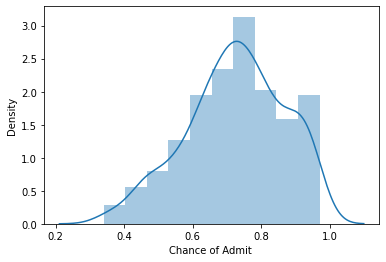

In [10]:
sns.distplot(df['Chance of Admit '], bins=10)

In [11]:
statistics(df['CGPA'])

,Variable,Mean,Standard Deviation,Median,Variance
0,CGPA,8.598925,0.595571,8.61,0.354705


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


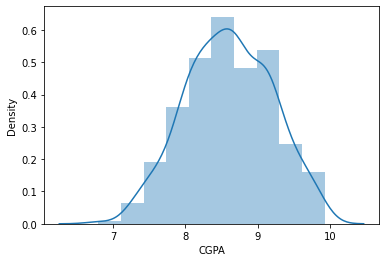

In [12]:
sns.distplot(df['CGPA'], bins=10)

In [13]:
statistics(df['GRE Score'])

,Variable,Mean,Standard Deviation,Median,Variance
0,GRE Score,316.8075,11.459295,317.0,131.315444


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


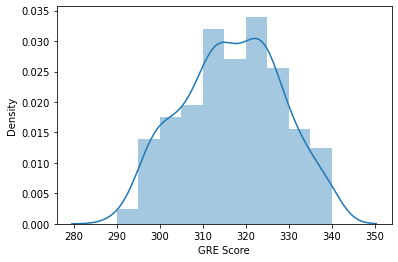

In [14]:
sns.distplot(df['GRE Score'], bins=10)

### Clustering Algorithm

`WCSS = Within Cluster Sum of Squares` <br />
Goal is to minimize **WCSS** using K-Means Clustering Algorithm.

In [15]:
wcss = []

for i in range(1, 11):
  km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  km.fit(df)
  wcss.append(km.inertia_)

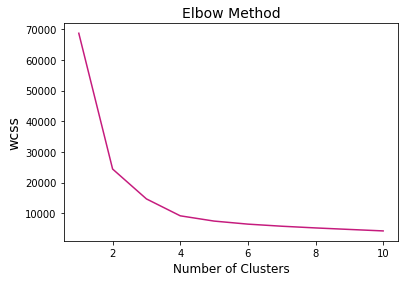

In [16]:
plt.plot(range(1, 11), wcss, c='#c51b7d')
plt.title('Elbow Method', size=14)
plt.xlabel('Number of Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

In [17]:
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=10, n_init=10, random_state=0)
kmeans.fit(df)

KMeans(max_iter=10, random_state=0)

In [18]:
centeroids = pd.DataFrame(kmeans.cluster_centers_,
                          columns=['GRE Score', 'TOEFL Score', 'University Ranking', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit '])
centeroids.index_name = 'ClusterID'
centeroids['ClusterID'] = centeroids.index
# centeroids = centeroids.reset_index(drop=True)
centeroids

,GRE Score,TOEFL Score,University Ranking,SOP,LOR,CGPA,Research,Chance of Admit,ClusterID
0,313.903226,106.306452,2.709677,3.322581,3.298387,8.456290,0.370968,0.687742,0
1,334.884615,117.057692,4.500000,4.509615,4.375000,9.477308,0.961538,0.927692,1
2,296.942857,97.800000,1.742857,2.257143,2.414286,7.682571,0.200000,0.512857,2
3,325.890411,112.246575,3.780822,3.910959,3.753425,9.025616,0.863014,0.815753,3
4,313.297297,100.756757,2.162162,2.594595,3.040541,8.211081,0.351351,0.654865,4
5,307.485714,106.628571,2.714286,3.028571,3.242857,8.290571,0.200000,0.662286,5
6,321.119403,107.940299,3.343284,3.619403,3.686567,8.712090,0.746269,0.759254,6
7,302.435897,101.974359,2.487179,2.833333,3.012821,8.128462,0.153846,0.591795,7


In [19]:
X_new = np.array([[43, 76, 56, 0, 1, 55, 10, 3]])
new_student = kmeans.predict(X_new)
print(f'New student belongs to cluster {new_student[0]}')

New student belongs to cluster 2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


# Hierarchical Clustering

In [20]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [21]:
scaler = StandardScaler().fit(df)
X = scaler.transform(df)
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.76481828,
         0.90911166,  1.37364801],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  0.45515126,
         0.90911166,  0.25029671],
       [-0.07046681, -0.56252785, -0.07660001, ..., -1.00563118,
         0.90911166, -0.03054111],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.42900622,
         0.90911166,  1.30343855],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.30403584,
        -1.09997489, -0.38158839],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  1.78160888,
         0.90911166,  1.58427637]])

In [22]:
distxy = squareform(pdist(X, metric='euclidean'))
links = linkage(distxy, method='complete', metric='euclidean')

print(distxy)
print(links)

[[0.         2.7935885  4.75104729 ... 0.92028142 4.71162195 0.86682594]
 [2.7935885  0.         2.43765467 ... 2.35048781 2.70455347 2.85945537]
 [4.75104729 2.43765467 0.         ... 4.36829302 2.56546909 4.71259147]
 ...
 [0.92028142 2.35048781 4.36829302 ... 0.         4.30226462 0.7806497 ]
 [4.71162195 2.70455347 2.56546909 ... 4.30226462 0.         4.66558981]
 [0.86682594 2.85945537 4.71259147 ... 0.7806497  4.66558981 0.        ]]
[[1.08000000e+02 1.51000000e+02 5.94309580e-01 2.00000000e+00]
 [9.80000000e+01 2.59000000e+02 6.88068852e-01 2.00000000e+00]
 [8.10000000e+01 2.12000000e+02 8.33831426e-01 2.00000000e+00]
 ...
 [7.89000000e+02 7.94000000e+02 7.03906837e+01 1.48000000e+02]
 [7.88000000e+02 7.95000000e+02 7.33088015e+01 2.52000000e+02]
 [7.96000000e+02 7.97000000e+02 9.44100600e+01 4.00000000e+02]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [32.5, 32.5, 71.25, 71.25],
  [10.0, 10.0, 51.875, 51.875],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [132.5, 132.5, 162.5, 162.5],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [202.5, 202.5, 232.5, 232.5],
  [185.0, 185.0, 217.5, 217.5],
  [147.5, 147.5, 201.25, 201.25],
  [110.0, 110.0, 174.375, 174.375],
  [30.9375, 30.9375, 142.1875, 142.1875]],
 'dcoord': [[0.0, 28.432871832188084, 28.432871832188084, 0.0],
  [0.0, 25.313158175154776, 25.313158175154776, 0.0],
  [0.0, 27.23103476865985, 27.23103476865985, 25.313158175154776],
  [0.0, 21.78390591455546, 21.78390591455546, 0.0],


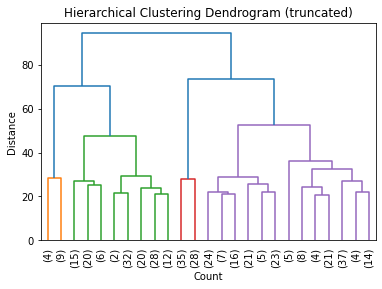

In [23]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Count')
plt.ylabel('Distance')
dendrogram(links, truncate_mode='lastp', p=25, show_leaf_counts=True, leaf_rotation=90)